# **Bloco 1: Limpeza de Dados**
No primeiro passo, vamos carregar o dataset, identificar e tratar valores ausentes, além de transformar variáveis categóricas em numéricas para facilitar a análise.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
print("Valores faltantes por coluna:")
print(data.isnull().sum())

data['bmi'].fillna(data['bmi'].median(), inplace=True)

data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

numeric_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Dataset Limpo e Normalizado:")
print(data.head())


Valores faltantes por coluna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Dataset Limpo e Normalizado:
      id       age  hypertension  heart_disease  avg_glucose_level       bmi  \
0   9046  1.051434             0              1           2.706375  1.005086   
1  51676  0.786070             0              0           2.121559 -0.098981   
2  31112  1.626390             0              1          -0.005028  0.472536   
3  60182  0.255342             0              0           1.437358  0.719327   
4   1665  1.582163             1              0           1.501184 -0.631531   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1         True         False              True   
1       1        False         

<ipython-input-2-a29fe4b748ea>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


# **Bloco 2: Análise de Fatores de Risco – Idade e AVC**
Vamos analisar como a idade afeta a probabilidade de AVC. Isso nos permitirá ver a distribuição das idades para pacientes que tiveram ou não AVC.

<ipython-input-37-71e54259c742>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='age', data=data, palette='flare')


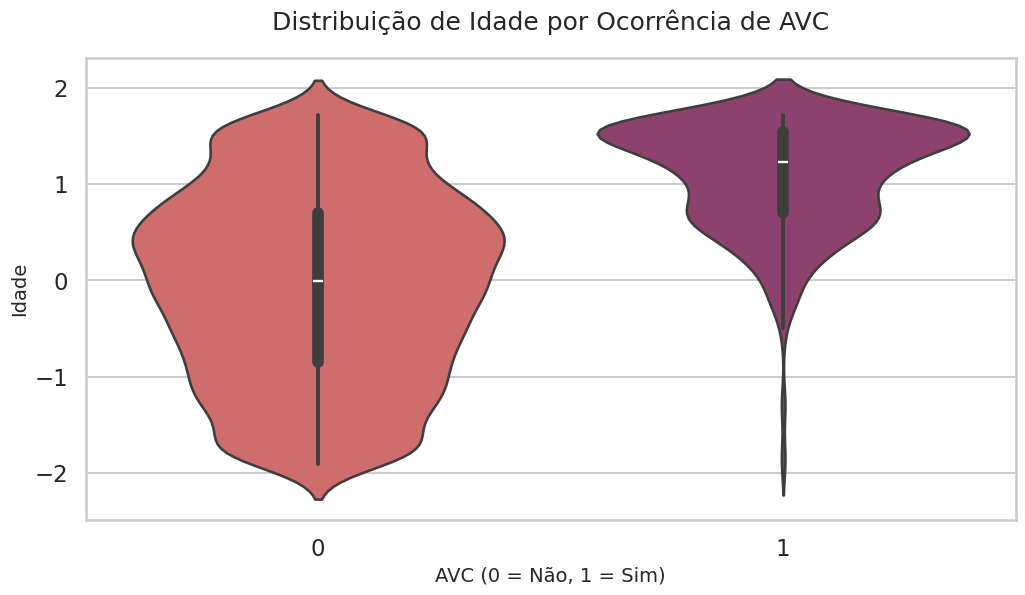



Estatística t: -29.69, p-valor: 0.0000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))

sns.violinplot(x='stroke', y='age', data=data, palette='flare')

plt.title('Distribuição de Idade por Ocorrência de AVC', fontsize=18, pad=20)
plt.xlabel('AVC (0 = Não, 1 = Sim)', fontsize=14)
plt.ylabel('Idade', fontsize=14)

plt.show()

idade_sem_avc = data[data['stroke'] == 0]['age']
idade_com_avc = data[data['stroke'] == 1]['age']

t_stat, p_value = ttest_ind(idade_sem_avc, idade_com_avc, equal_var=False)

print(f"\n\nEstatística t: {t_stat:.2f}, p-valor: {p_value:.4f}")

# **Bloco 3: Análise de Fatores de Risco – Hipertensão e AVC**
Aqui vamos explorar a relação entre a hipertensão e o AVC. Esse gráfico de barras vai mostrar a proporção de AVC entre pacientes hipertensos e não hipertensos.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


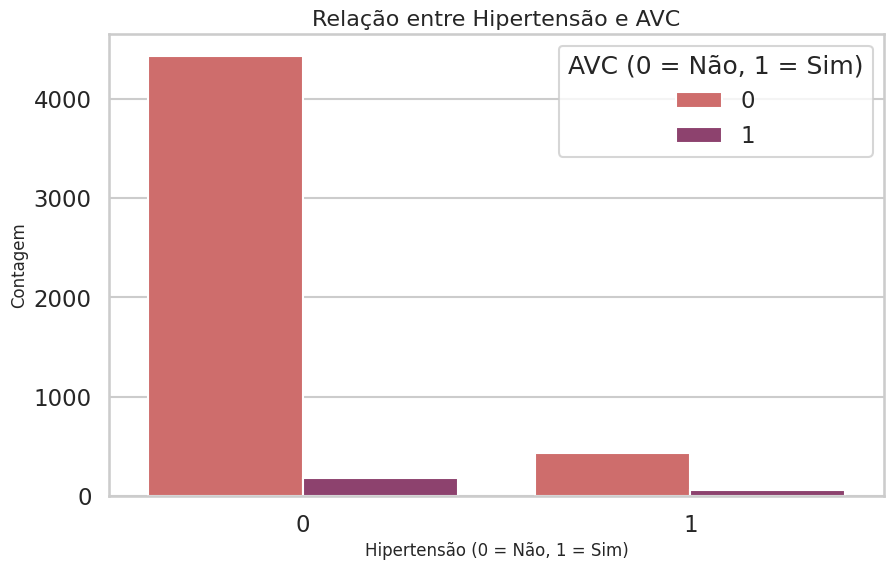



Valor do qui-quadrado: 81.61, p-valor: 0.0000


In [13]:
from scipy.stats import chi2_contingency

plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='stroke', data=data, palette='flare')
plt.title('Relação entre Hipertensão e AVC', fontsize=16)
plt.xlabel('Hipertensão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='AVC (0 = Não, 1 = Sim)', loc='upper right')
plt.show()

contingency_table = pd.crosstab(data['hypertension'], data['stroke'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\n\nValor do qui-quadrado: {chi2:.2f}, p-valor: {p_value:.4f}")

# **Bloco 4: Análise de Fatores de Risco – Glicose e AVC**
Agora, vamos visualizar a relação entre o nível médio de glicose no sangue e a ocorrência de AVC.



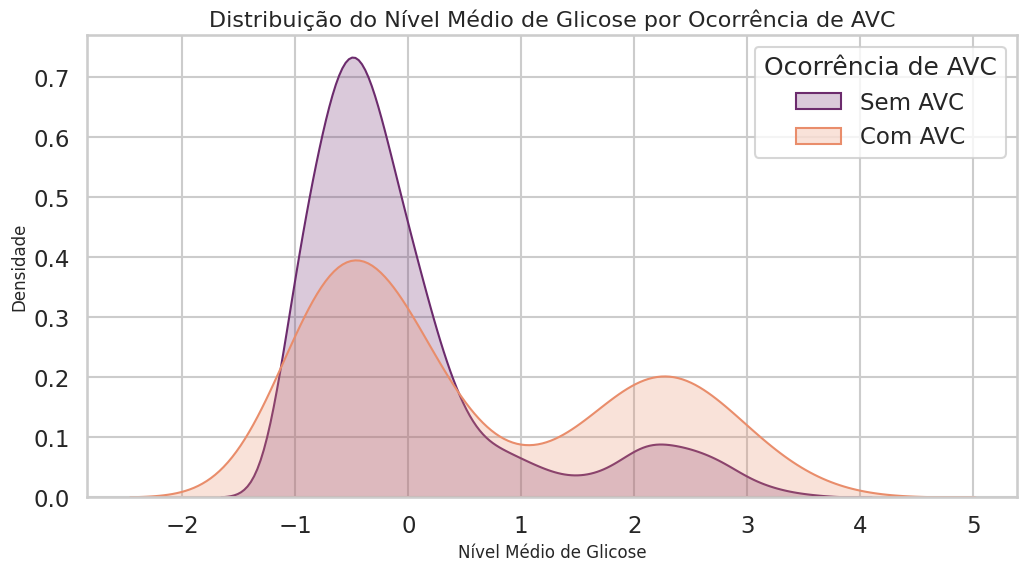



Estatística U: 471239.00, p-valor: 0.0000


In [56]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette('flare')
sns.kdeplot(data=data[data['stroke'] == 0]['avg_glucose_level'], label='Sem AVC', fill=True, color=palette[5])
sns.kdeplot(data=data[data['stroke'] == 1]['avg_glucose_level'], label='Com AVC', fill=True, color=palette[0])
plt.title('Distribuição do Nível Médio de Glicose por Ocorrência de AVC', fontsize=16)
plt.xlabel('Nível Médio de Glicose', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title='Ocorrência de AVC')
plt.show()

from scipy.stats import mannwhitneyu

glicose_sem_avc = data[data['stroke'] == 0]['avg_glucose_level']
glicose_com_avc = data[data['stroke'] == 1]['avg_glucose_level']

stat, p_value = mannwhitneyu(glicose_sem_avc, glicose_com_avc, alternative='two-sided')

print(f"\n\nEstatística U: {stat:.2f}, p-valor: {p_value:.4f}")

# **Bloco 5: Distribuição Etária de Pacientes com AVC**
Usamos o histograma para visualizar a distribuição das idades dos pacientes que sofreram AVC. Isso nos ajudará a identificar faixas etárias de maior risco.



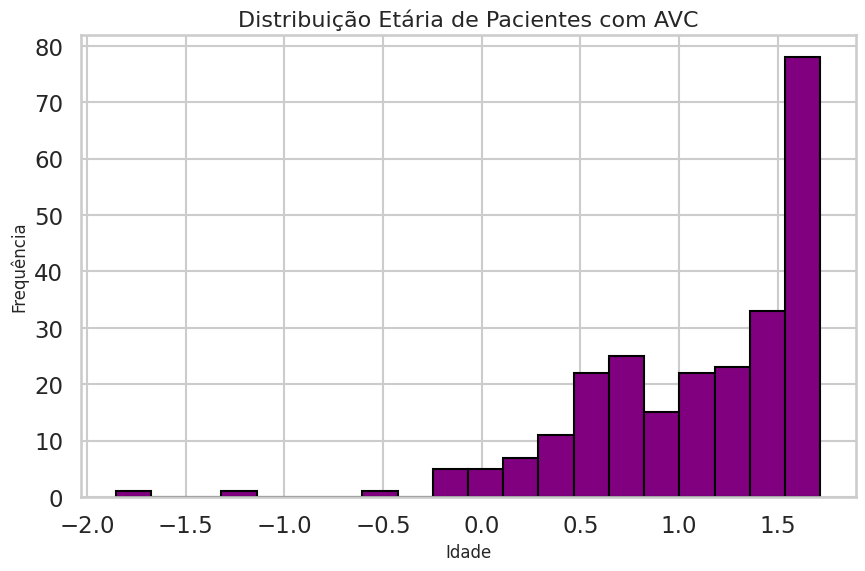



Idade Média: 1.08 anos
Idade Mediana: 1.23 anos
Idade Moda: 1.5379353389188812 anos
Desvio Padrão: 0.56 anos


In [27]:
stroke_patients = data[data['stroke'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(stroke_patients['age'], bins=20, color='purple', edgecolor='black')
plt.title('Distribuição Etária de Pacientes com AVC', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

media_idade = stroke_patients['age'].mean()
mediana_idade = stroke_patients['age'].median()
moda_idade = stroke_patients['age'].mode()[0]
desvio_padrao_idade = stroke_patients['age'].std()

print(f"\n\nIdade Média: {media_idade:.2f} anos")
print(f"Idade Mediana: {mediana_idade:.2f} anos")
print(f"Idade Moda: {moda_idade} anos")
print(f"Desvio Padrão: {desvio_padrao_idade:.2f} anos")

# **Bloco 6: Modelagem Simples – Classificação Binária com Regressão Logística**
Agora vamos construir um modelo simples para prever a ocorrência de AVC. Primeiro, aplicamos técnicas de balanceamento (SMOTE) para lidar com o desbalanceamento de classes.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['id', 'stroke'])
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled)

y_pred = model.predict(X_test_scaled)

# **Bloco 7: Avaliação de Desempenho do Modelo**
Após balancear as classes, avaliaremos o desempenho do modelo. Isso vai nos fornecer métricas de precisão, recall e f1-score para cada classe.

In [22]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1444
           1       0.16      0.69      0.27        89

    accuracy                           0.78      1533
   macro avg       0.57      0.74      0.57      1533
weighted avg       0.93      0.78      0.84      1533

